In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AfterCleaning_MoviesDataset.csv')

In [3]:
df.head()

Title  Release_year Certificate  \
0                                      Avatar          2009          UA   
1                           Avengers: Endgame          2019          UA   
2                    Avatar: The Way of Water          2022          UA   
3                                     Titanic          1997          UA   
4  Star Wars: Episode VII - The Force Awakens          2015           U   

   Rating  Runtime(min)   Genre  Metascore         Director  \
0     7.9         162.0  Action         83    James Cameron   
1     8.4         181.0  Action         78  Anthony Russo,    
2     7.6         192.0  Action         67    James Cameron   
3     7.9         194.0   Drama         75    James Cameron   
4     7.8         138.0  Action         80      J.J. Abrams   

                 Stars    Votes    Gross($)  
0    Sam Worthington,   1358356  2923706026  
1  Robert Downey Jr.,   1207990  2799439100  
2    Sam Worthington,    451677  2320250281  
3  Leonardo DiCaprio,   1243170  2264743305  
4       Daisy Ridley,    954671  2071310218

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         943 non-null    object 
 1   Release_year  943 non-null    int64  
 2   Certificate   943 non-null    object 
 3   Rating        943 non-null    float64
 4   Runtime(min)  943 non-null    float64
 5   Genre         943 non-null    object 
 6   Metascore     943 non-null    int64  
 7   Director      943 non-null    object 
 8   Stars         943 non-null    object 
 9   Votes         943 non-null    int64  
 10  Gross($)      943 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 81.2+ KB


In [5]:
df.describe()

Release_year      Rating  Runtime(min)   Metascore         Votes  \
count    943.000000  943.000000    943.000000  943.000000  9.430000e+02   
mean    2007.535525    6.843902    117.854719   59.752916  3.775654e+05   
std       10.498335    0.885039     21.898024   15.910492  3.406830e+05   
min     1937.000000    3.400000     69.000000   12.000000  1.940000e+03   
25%     2002.000000    6.300000    102.000000   48.000000  1.652315e+05   
50%     2010.000000    6.800000    116.000000   59.000000  2.726650e+05   
75%     2015.000000    7.500000    130.000000   71.000000  4.775450e+05   
max     2023.000000    9.200000    238.000000  100.000000  2.768234e+06   

           Gross($)  
count  9.430000e+02  
mean   4.250010e+08  
std    3.086115e+08  
min    1.783117e+08  
25%    2.279610e+08  
50%    3.214577e+08  
75%    4.878645e+08  
max    2.923706e+09

In [6]:
df.describe(include='object')

Title Certificate   Genre          Director         Stars
count                 943         943     943               943           943
unique                931          17      11               469           399
top     The Addams Family          UA  Action  Steven Spielberg  Tom Cruise, 
freq                    2         398     427                22            22

In [7]:
NoOfMoviesByYears = df["Release_year"].value_counts().reset_index()

In [8]:
NoOfMoviesByYears.rename(columns={"index":"Release_year","Release_year":"No_count"},inplace=True)

In [9]:
NoOfMoviesByYears.sort_values("Release_year",inplace=True)

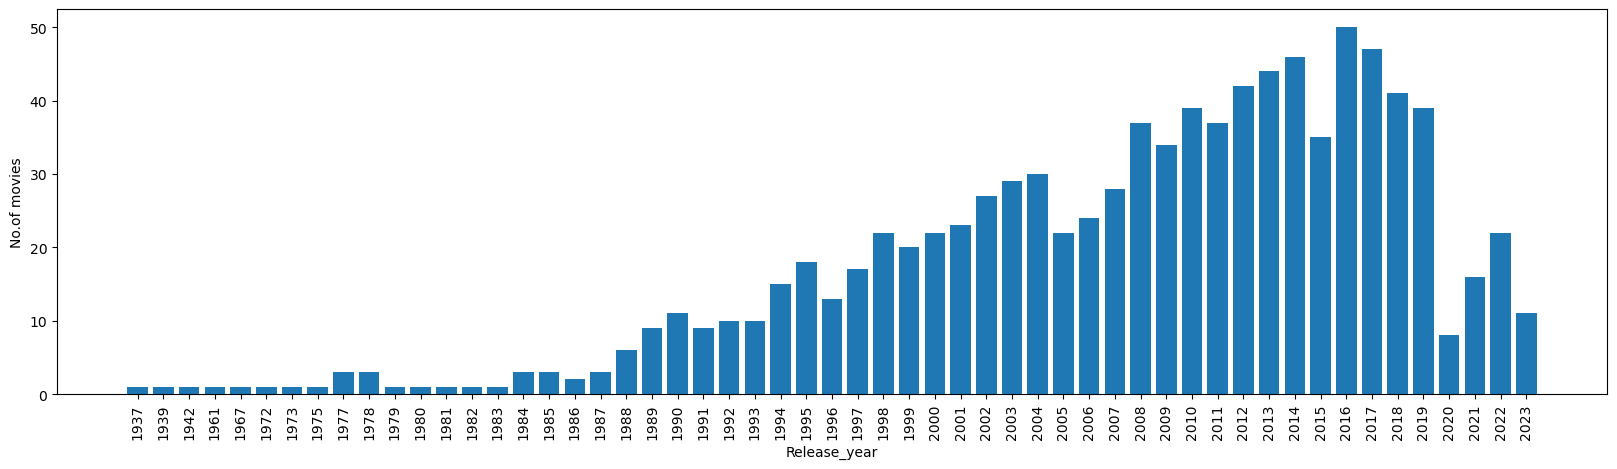

In [10]:
plt.figure(figsize=(20,5))
plt.xlabel("Release_year")
plt.ylabel("No.of movies")
x = np.arange(len(NoOfMoviesByYears['Release_year']))
y = NoOfMoviesByYears['No_count']
plt.xticks(x , NoOfMoviesByYears['Release_year'] , rotation = 90)
plt.bar(x,y)
plt.show()

In [11]:
GenreWiseMovies = df["Genre"].value_counts().reset_index()

In [12]:
GenreWiseMovies.rename(columns = {"index":"Genre","Genre":"No_count"} , inplace = True)

In [13]:
GenreWiseMovies

Genre  No_count
0        Action       427
1     Animation       158
2        Comedy       120
3     Adventure        81
4         Drama        71
5     Biography        32
6         Crime        25
7        Horror        22
8       Mystery         3
9   Documentary         2
10      Fantasy         2

In [14]:
import plotly.express as px
fig = px.pie(GenreWiseMovies, values='No_count', names='Genre')
fig.show()

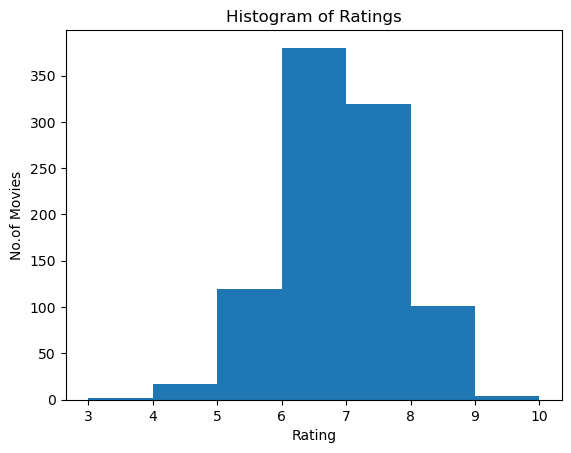

<Figure size 640x480 with 0 Axes>

In [15]:
plt.xlabel("Rating")
plt.ylabel("No.of Movies")
plt.title("Histogram of Ratings")
plt.hist(df['Rating'],bins = [3,4,5,6,7,8,9,10])
plt.show()
plt.savefig('a.jpg')

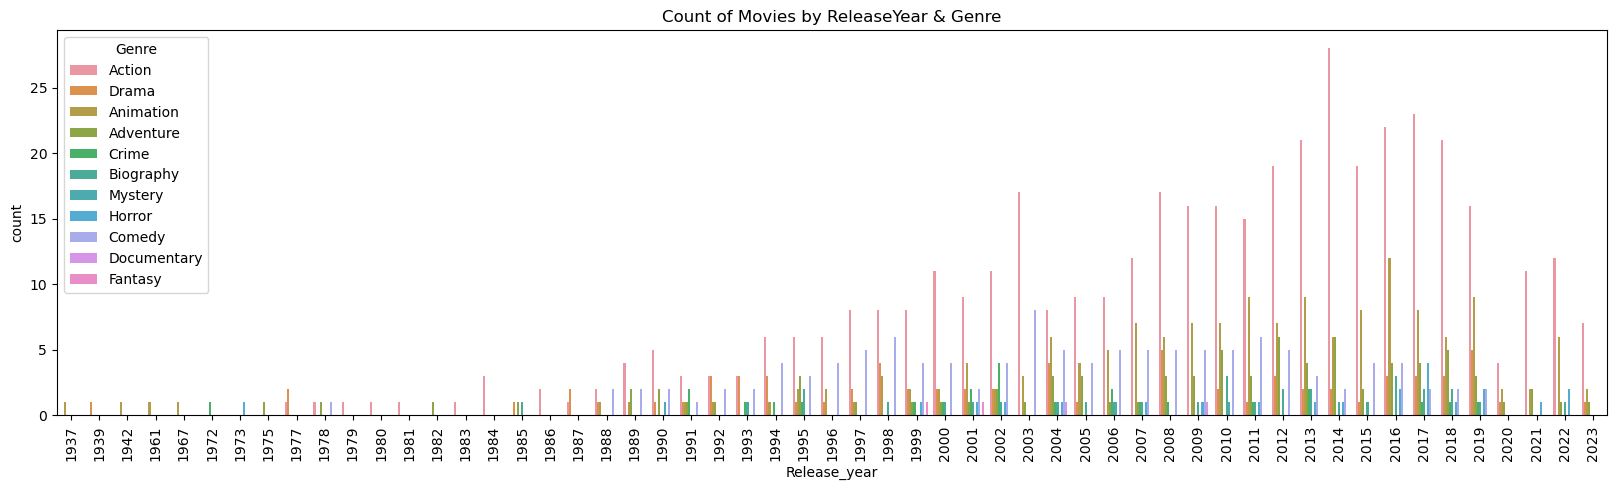

In [16]:
plt.figure(figsize=(20,5))
plt.title("Count of Movies by ReleaseYear & Genre")
sns.countplot(x ='Release_year', hue = "Genre", data = df)
plt.xticks(rotation = 90)
plt.show()

In [17]:
YearWiseGross = df.groupby("Release_year")[["Gross($)"]].sum().reset_index()

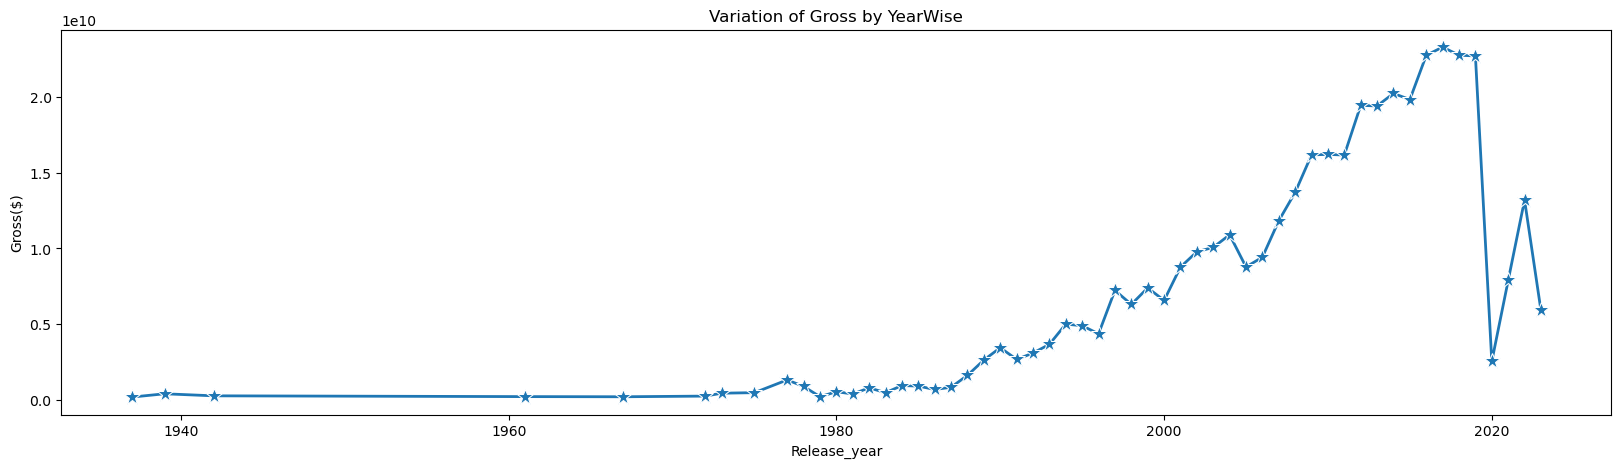

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(x = "Release_year", y = "Gross($)",data = YearWiseGross,marker = "*", markersize = 12,linewidth = 2)
plt.xlabel("Release_year")
plt.ylabel("Gross($)")
plt.title("Variation of Gross by YearWise")
plt.show()

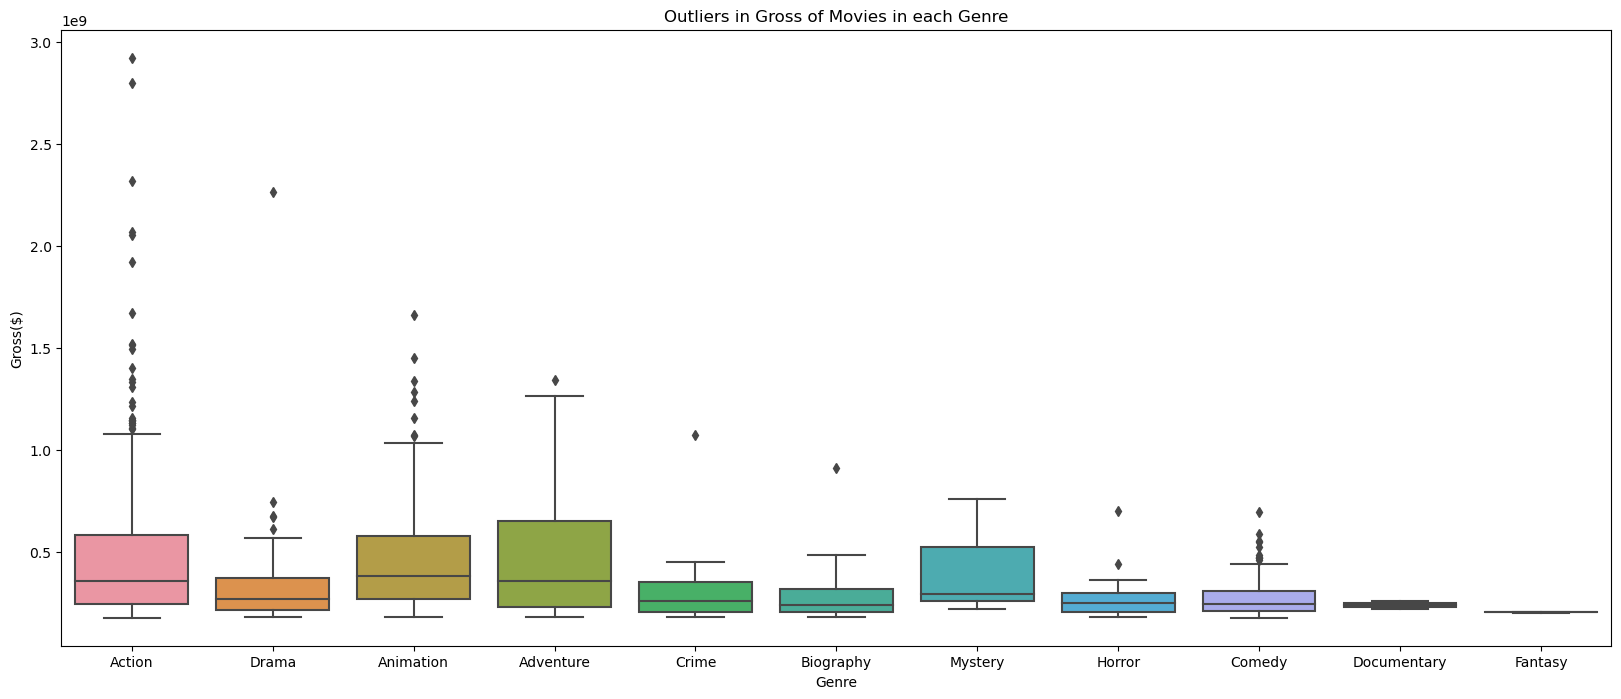

In [19]:
plt.figure(figsize=(20,8))
plt.title("Outliers in Gross of Movies in each Genre")
sns.boxplot(data=df,x="Genre",y="Gross($)")
plt.show()

In [20]:
AvgVotesGenreWise = df.groupby("Genre")[["Votes"]].mean().reset_index()

In [21]:
AvgVotesGenreWise

Genre          Votes
0        Action  421747.932084
1     Adventure  348221.148148
2     Animation  263459.645570
3     Biography  515918.156250
4        Comedy  265211.850000
5         Crime  729356.080000
6   Documentary   86273.000000
7         Drama  431993.366197
8       Fantasy  325905.000000
9        Horror  280894.954545
10      Mystery  627000.333333

In [22]:
import plotly.express as px
fig = px.pie(AvgVotesGenreWise, values='Votes', names='Genre')
fig.show()

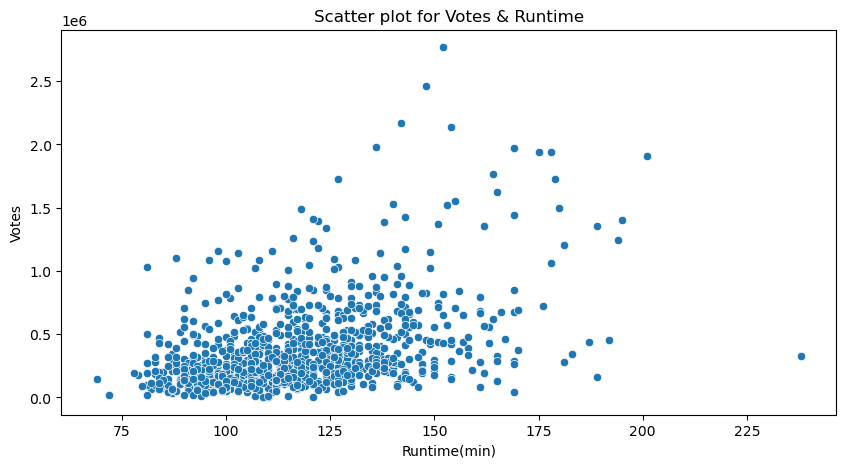

In [23]:
plt.figure(figsize = (10,5))
plt.title("Scatter plot for Votes & Runtime")
sns.scatterplot(x = df["Runtime(min)"],y = df['Votes'])
plt.show()

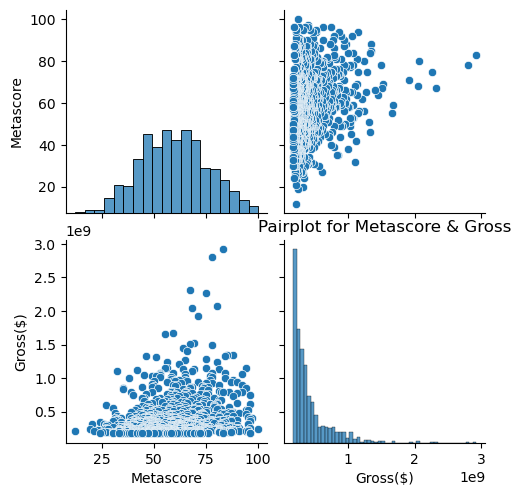

In [24]:
sns.pairplot(data = df,vars = ["Metascore","Gross($)"])
plt.title("Pairplot for Metascore & Gross")
plt.show()

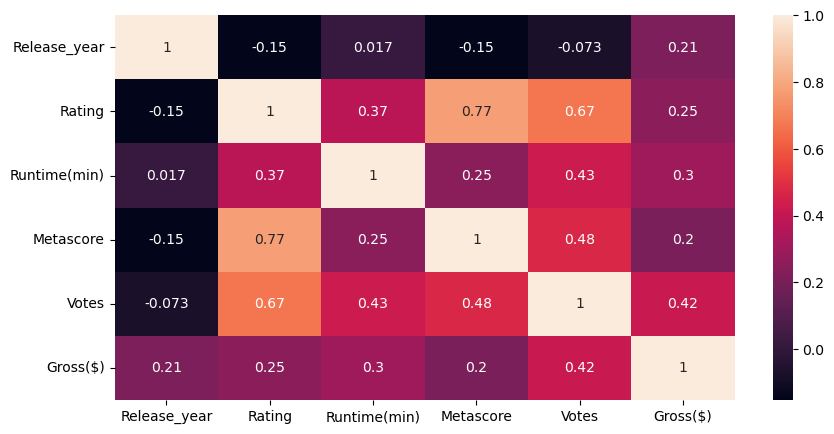

In [25]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(numeric_only = True) , annot = True)
plt.show()

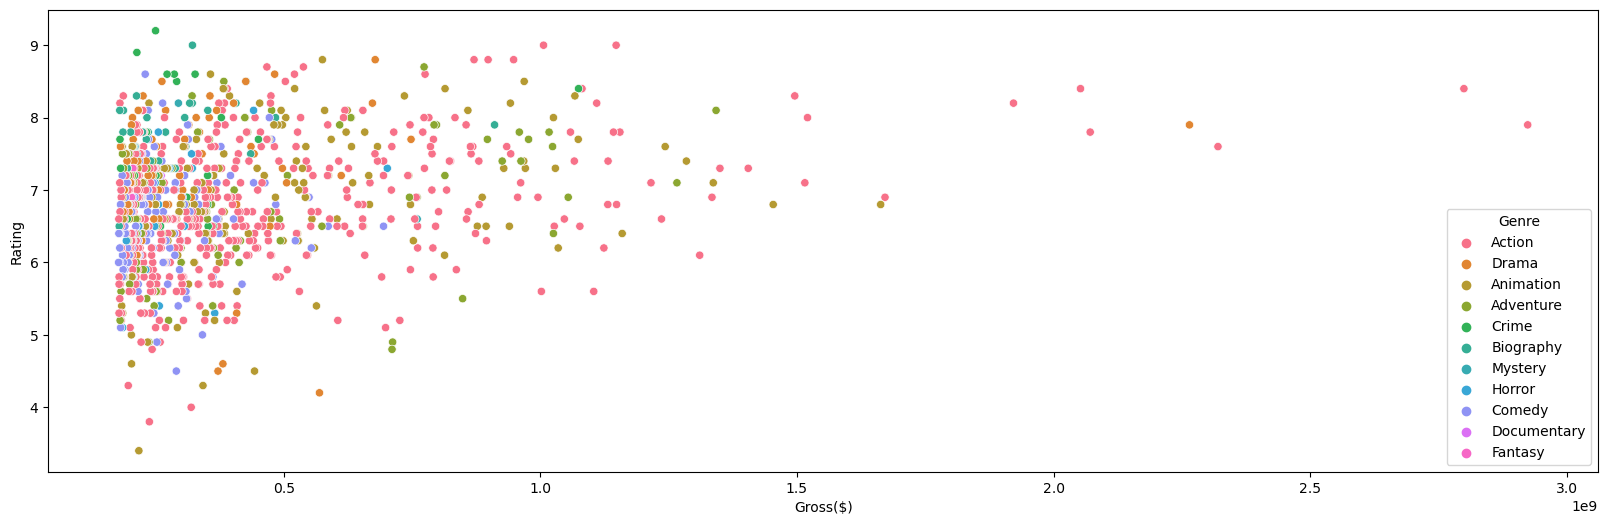

In [26]:
plt.figure(figsize = (20,6))
sns.scatterplot(x = "Gross($)",y = "Rating",hue = "Genre",data = df)
plt.show()